# Lecture 12 Scikit-Learn Library for Data Science <a id="section0"/>

- [12.1 Introduction to Scikit-Learn](#section1)
- [12.2 Supervised Learning: Regression](#section2)
- [12.3 Supervised Learning: Classification](#section3)
    - [12.3.1 k-Nearest Neighbors (kNN)](#section4)
    - [12.3.2 Support Vector Machines (SVM)](#section5)
    - [12.3.3 Logistic Regression](#section6)
    - [12.3.4 Decision Trees](#section7)
    - [12.3.5 Random Forest](#section8)
    - [12.3.6 Naive Bayes](#section9)
    - [12.3.7 Perceptron](#section10)
    - [12.3.8 Stochastic Gradient Descent (SGD)](#section11)
- [12.4 Unsupervised Learning: Clustering](#section12)
- [12.5 Flow Chart: How to Choose an Estimator](#section13)
- [12.6 Appendix: Optical Character Recognition](#section14)
- [References](#section15)

# 12.1 Introduction to Scikit-Learn <a id="section1"/>

[Scikit-Learn](http://github.com/scikit-learn/scikit-learn) is a Python library designed to provide access to machine learning algorithms within Python code, through a clean and well-thought-out API. It has been built by hundreds of contributors from around the world, and is used across industry and academia.

Scikit-Learn is built upon Python's NumPy (Numerical Python) and SciPy (Scientific Python) libraries, which enable efficient numerical and scientific computation within Python. 

Scikit-Learn is imported via the `sklearn` module. 

In [1]:
import sklearn

### Representation of Data in Scikit-Learn

Most machine learning algorithms implemented in scikit-learn expect the training data to be stored in a **two-dimensional array** (matrix). The size of the array is expected to be `[n_samples, n_features]`.

- **n_samples** is the number of samples (inputs, data points, instances, examples), where each sample is an item to process (e.g., classify).
  A sample can be a document, a picture, a video, an astronomical object, a row in database or CSV file,
  or whatever we can describe with a fixed set of quantitative features.
- **n_features** is the number of features or distinct characteristics that can be used to describe each
  sample in a quantitative manner. Features are generally real-valued numbers, but can also be boolean or discrete-valued.

### A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to look at the iris dataset stored by the scikit-learn library.

The data consists of measurements of three different species of irises:
  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

Each data point has 4 features, which include:
  1. Sepal length in cm
  2. Sepal width in cm
  3. Petal length in cm
  4. Petal width in cm

All four features are measured in centimeters (cm). Note that the data are not images of iris flowers, but 4 measurements for each flower. 

Examples of images from the three iris species are shown below. 

<img src="images/iris_pic1.png" alt="Drawing" style="width: 500px;"/>

There are 50 samples for each species, therefore there are 150 samples in total for all 3 species.  
  
Scikit-learn provides a helper function `load_iris` to load the dataset into a dictionary with numpy arrays as values.

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# 150 samples, 4 features
iris.data.shape

(150, 4)

In [6]:
# Show the features for the first sample
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [7]:
# Target is the array of class labels for each sample
iris.target.shape

(150,)

In [8]:
print(iris.target)
# 0 is Iris Setosa, 1 is Iris Versicolor, 2 is Iris Virginica

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [10]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Although the dataset is four-dimensional, we can visualize two of the dimensions at a time using a scatter plot.

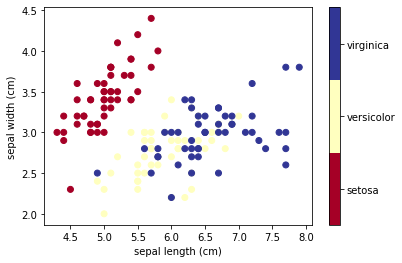

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 0    # sepal_length
y_index = 1    # sepal_width

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

### Other Available Data in Scikit-Learn

Besides the Iris dataset, scikit-learn provides other datasets, which can be loaded directly from scikit-learn. 
The datasets include:

- **Packaged Data:** several small datasets are packaged with the scikit-learn installation,   and can be downloaded using the tools in ``sklearn.datasets.load_*``
- **Downloadable Data:** several larger datasets are available for download, and scikit-learn includes tools which streamline this process.  These tools can be found in ``sklearn.datasets.fetch_*``
- **Generated Data:** several datasets can be generated using various random sample generators. These are available in the ``sklearn.datasets.make_*``

In [12]:
from sklearn import datasets

In [ ]:
# Type datasets.load_<TAB> to see all available datasets
datasets.load_

# Type datasets.fetch_<TAB> to see all available datasets
datasets.fetch_

# Type datasets.make_<TAB> to see all available datasets
datasets.make_

# 12.2 Supervised Learning: Regression <a id="section2"/>

In **supervised learning**, an algorithm processes a dataset consisting of both samples (training data) and labels. Supervised learning is further broken down into two main categories: **classification** and **regression**. In classification the label is discrete such as the class membership, while in regression the label is continuous. We will first look at examples of performing regression with scikit-learn, and afterwards we will study classification tasks.

The implementations of machine learning algorithms and models in scikit-learn are called ***estimators*** or estimator objects. Each estimator can be fitted to input data using the `fit()` method in scikit-learn. Fitting an estimator to data is equivalent to training a model, that is, the parameters of the model are learned from the data.

### Linear Regression

For instance, a Linear Regression estimator is imported and implemented in scikit-learn as follows.

In [13]:
from sklearn.linear_model import LinearRegression

In the following cell, a new instance of a Linear Regression estimator is created, and we named it `lr_model`. The argument `normalize=True` will normalize the training data to 0 mean and 1 variance before the training.

In [14]:
lr_model = LinearRegression(normalize=True)

In [15]:
print(lr_model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


Let's create data for fitting the Linear Regression model. 

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


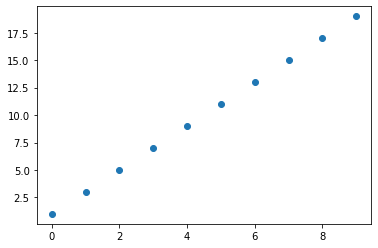

In [16]:
x = np.arange(10)
y = 2 * x + 1

print(x)
print(y)

plt.plot(x, y, 'o')
plt.show()

Since the input data in scikit-learn needs to be a 2-dimensional array, we will add a second dimension to `X` with `np.newaxis`.

In [17]:
# The input data needs to be a 2D array
X = x[:, np.newaxis]
print(X.shape)
print(y.shape)

(10, 1)
(10,)


The next line fits the data to the model. 

In [18]:
# fit the model on our data
lr_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

The learned model parameters are shown next.

In [19]:
# underscore at the end indicates a fit parameter
print(lr_model.coef_)
print(lr_model.intercept_)

[2.]
0.9999999999999982


In linear regression, the goal is to learn a linear model (line) that fits the input data in an optimal way. The estimator has two parameters: coefficient (the slope of the line) and intercept (the point of interception of the y-axis). The algorithm solves the regression by minimizing the deviation of the input data from the line. 

<img src="images/REG_pic1.png" alt="Drawing" style="width: 350px;"/>

The two parameters shown in the above cell are correctly estimated, since the data was generated from the line `2 * x + 1`, and the model found a line with a slope 2 and intercept of approximately 1, as expected.

### Regression - Example 2

Let's look at another example where the data does not come from a straight line. 

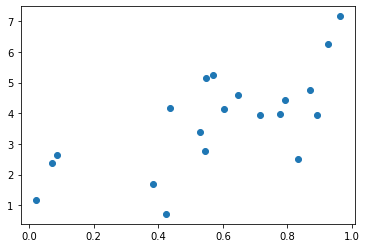

In [20]:
# Create data
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o')
plt.show()

Apply Linear Regression to obtain a new model that fits the data. 

In [21]:
lr_model_2 = LinearRegression()
lr_model_2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predict target values `y_predicted` for given input values `X`. 

In [22]:
y_predicted = lr_model_2.predict(X)

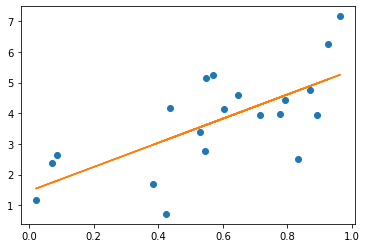

In [23]:
plt.plot(X, y, 'o') # plot the training data with circle markers
plt.plot(X, y_predicted)     # plot the predicted line
plt.show()

### Regression with Random Forest

Scikit-learn also offers many more sophisticated models for regression, besides Linear Regression. In the next example, a Random Forest regression model is used to fit the data that we created. The output of the model is non-linear, and hence, this model fits better the data than the Linear Regression model.

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


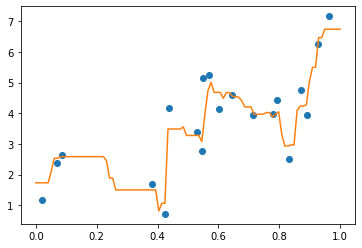

In [24]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_predicted = rf_model.predict(X_fit)

# Plot the data and the model prediction
plt.plot(X, y, 'o')
plt.plot(X_fit.squeeze(), y_predicted)

# 12.3 Supervised Learning: Classification <a id="section3"/>

## 12.3.1 k-Nearest Neighbors (kNN) <a id="section4"/>

We will illustrate classification first with the ***k-nearest neighbors (kNN)*** algorithm. This algorithm uses a very simple learning strategy: to predict the target class of a new sample, it takes into account its *k* closest samples in the training set and predicts the class labels based on majority voting of these samples.

For instance, if *k*=1, to assign a class label to the test example shown with the white square in the figure below, the kNN classifier will first calculate the distance to each data point in the training set, and afterward, it will assign the class of the nearest data point to the test example.  

<img src="images/kNN_pic1.png" alt="Drawing" style="width: 400px;"/>

Or, if *k*=3, then the 3 nearest neighbors will be considered to classify a test data point. For the test data points shown with the `+` marker in the figure below, the class is obtained by voting based on the class labels of the 3 closest data points. 

<img src="images/kNN_pic2.png" alt="Drawing" style="width: 350px;"/>

kNN is a simple classification algorithm, and one main disadvantage is that the classifier needs to remember all of the training data and store it for future comparisons with test samples. This can be space inefficient when working with large datasets having many data points, and it can be computationally expensive since it requires calculating the distance to all data points.

Let's try kNN on the iris classification problem. In the following cell, we passed the newly created classifier object to the name `knn` and we chose to use 5 nearest neighbors.

In [25]:
from sklearn import neighbors

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

X, y = iris.data, iris.target

The full set of arguments that can be passed to kNN in scikit-learn is shown below, and more information about the arguments can be found at this [link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

    class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto',
    leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

### Train the Model

In [26]:
# fit the model, model.fit(training data, training target)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

The model training is depicted in the following diagram. Training data/samples/instances (often denoted `X`) and training target/label/class/category (often denoted `y`) are fit to the model. The method `fit` uses the specified **learning algorithm** for estimating the parameters of the  model. The learned parameters constitute the **model state** that can later be used to make predictions (to classify test data).

Note again the syntax for training/fitting a model: `model.fit(data, target)`

<img src="images/api_diagram-predictor.fit.svg" alt="Drawing" style="width: 300px;"/>

### Make Predictions

Next, we will use our trained model to make predictions on the same dataset `X` that we used for training. To predict, the model uses the input data together with the model state to output a target/label for each data point.

Note the syntax for predicting with a model: `model.predict(data)`

<img src="images/api_diagram-predictor.predict.svg" alt="Drawing" style="width: 350px;"/>

In [27]:
y_predicted = knn.predict(X)

# y_predicted is an array of predicted class labels for each input
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
y_predicted.shape

(150,)

The output of `model.predict()` is an array with a class label assigned to each data instance. The array `y_predicted` has 150 items, because we passed an array `X` with 150 data instances.

Compare it to the ground-truth target array `y` given below. 

In [29]:
# Ground-truth target array
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We can also make a prediction only on a subset of the data. For example, this is the prediction for the first two samples. The predicted class labels are 0 and 0.

In [30]:
result = knn.predict(X[0:2])

In [31]:
result

array([0, 0])

Note that `predict` expects the data to be two-dimensional, and if we input only 1 sample, we will get an error. 

In [32]:
result_1 = knn.predict(X[0])

ValueError: Expected 2D array, got 1D array instead:
array=[5.1 3.5 1.4 0.2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

This is because the shape of the first sample is `(4,)`. If we make the sample two-dimensional with `x[0, np.newaxis]`, then we can perform a prediction without error. 

In [33]:
X[0].shape

(4,)

In [34]:
# This works, we change the shape from (4,) to (1,4)
result_1 = knn.predict(X[0, np.newaxis])

In [35]:
print(result_1)

[0]


Or, we can use the suggestion in the error message, and use `array.reshape(1-,1)`.

In [36]:
first_sample = X[0].reshape(1,-1)
first_sample.shape

(1, 4)

In [37]:
result_2 = knn.predict(first_sample)
print(result_2)

[0]


Similarly, we can make prediction by specifying arbitrary input features, for example, an iris flower that has 3cm x 5cm sepal and 4cm x 2cm petal, as follows. 

In [38]:
# what kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
result_2 = knn.predict([[3, 5, 4, 2],])

In [39]:
print(result_2)

[1]


In [40]:
print(iris.target_names[result_2])

['versicolor']


We can also do probabilistic predictions with `predict_proba`, which outputs the probability that a sample belongs to each of the three iris species. In the output, 1 as the first item means target class 0. 

In [41]:
knn.predict_proba(first_sample)

array([[1., 0., 0.]])

Applying the `argmax()` function will output the index of the greatest element in the array. 

In [42]:
knn.predict_proba(first_sample).argmax()

0

In [43]:
# for the first 4 data samples
knn.predict_proba(X[0:4])

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [44]:
knn.predict_proba(X[0:4]).argmax(axis=1)

array([0, 0, 0, 0], dtype=int64)

### Evaluate the Performance

***Model evaluation*** (model validation) is determining how well the model predictions are relative to the known target labels. 

To assess the accuracy of the prediction, we can compute the average success rate, i.e., all cases where the predicted target label `y_predicted` is the same as the ground-truth target label `y`. 

In [45]:
(y == y_predicted).mean()

0.9666666666666667

Or, using `.sum().` we can see that the model predicted correctly 145 samples out of the 150 samples in the dataset `X`. The above function `mean()` just calculates the average as 145/150.

In [46]:
(y == y_predicted).sum()

145

And, instead of manually calculating the accuracy, we can use `model.score()` to calculate the average success rate. This method first performs prediction on a set of data inputs, and afterwards it calculates the accuracy of the predicted class labels in comparison to the true class labels. 

The syntax is: `model.score(data, target)`

<img src="images/api_diagram-predictor.score.svg" alt="Drawing" style="width: 400px;"/>

In [47]:
accuracy = knn.score(X, y)
accuracy

0.9666666666666667

One additional way to calculate the average success rate is to import the `accuracy_score` metric, and then apply it to find the match between ground-truth and predicted class labels. 

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_predicted)

0.9666666666666667

Another useful way to examine the prediction results is to view the **confusion matrix**, that is, the matrix showing the frequency of inputs and outputs for each class. In the output of this cell, we can see in the first row that all 50 data points in class 0 (iris setosa) were correct. In the second row, we see that 47 data points in class 1 (iris versicolor) were correct, but 3 data points were predicted in class 2 (iris virginica). Similarly, 2 data points from class 2 were incorrectly classified as class 1. Apparently, there is some confusion between the second and third species. And, as we know, out of 150 data points, in total 5 data points were misclassified, which can be seen in the off-diagonal elements in the confusion matrix.

In [49]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


### Train-test Data Split

When building a machine learning model, it is important to evaluate the trained model on data that was not used to fit it, since the **generalization** ability of the model on new unseen data is of primary concern. 

Correct evaluation of a model is done by leaving out a subset of the data when training the model, and using it afterwards for model evaluation.

Scikit-learn provides the function `sklearn.model_selection.train_test_split` to automatically split a dataset into two subsets: ***training dataset*** and ***testing dataset***. This function shuffles the data and randomly splits it into a train and test set. Setting the `random_state` parameter allows to obtain deterministic results when using a random number generator. Setting `stratify=y` will ensure that the training and testing datasets have the same proportions of data points from the 3 classes of irises. 

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.25, stratify=y)

In [51]:
print('Training data inputs', X_train.shape)
print('Training labels', y_train.shape)
print('Testing data inputs', X_test.shape)
print('Testing labels', y_test.shape)

Training data inputs (112, 4)
Training labels (112,)
Testing data inputs (38, 4)
Testing labels (38,)


We can use the `bincount()` function to examine how the data from different classes were distributed in the training and testing datasets. We can see that the datasets are stratified. 

In [52]:
print(np.bincount(y_train))
print(np.bincount(y_test))

[38 37 37]
[12 13 13]


Let's re-train and re-evaluate the model.

In [53]:
# 1. initialize the model
knn_model = neighbors.KNeighborsClassifier()

# 2. fit the model on train data
knn_model.fit(X_train, y_train)

# 3. evaluate the model on test data
accuracy = knn_model.score(X_test, y_test)

print(f'The test accuracy is {round(accuracy, 4) * 100}%')

The test accuracy is 97.37%


This example was not the best though, because the obtained score on the unseen test data (97.37%) is typically lower than the accuracy obtained by evaluating the model on the training data (96.67% in this case). This is probably due to the small dataset. In practice, evaluating a machine learning model on the training data is unacceptable in all scenarios.

Finally, how do we know how many nearest neighbors to use: 5, 7, 29? Well, it is not easy to answer that question. First, we can make an intuitive guess based on our understanding of the dataset, or second, we can run the model several times using different numbers of nearest neighbors and see which model performs the best.

### Plot the Decision Boundary

And, if we select only 2 features of the iris data, we can also inspect the decision boundary. Let's select the last two features, and plot the decision boundary for the model using the function below. 

In [54]:
X1 = iris.data[:, [2, 3]] # select only the last two features
y1 = iris.target

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=123, test_size=0.25, stratify=y1)

knn_model_2 = neighbors.KNeighborsClassifier()

knn_model_2.fit(X1_train, y1_train)

accuracy = knn_model_2.score(X1_test, y1_test)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

The test accuracy is 97.37 %


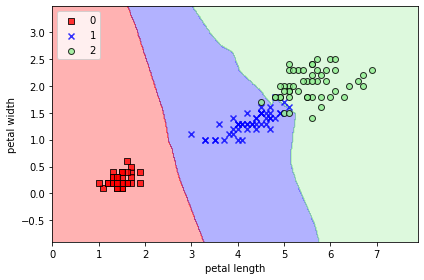

In [55]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # Adapted from Python Machine Learning (2nd Ed.) Code Repository, Sebastian Raschka, 
    # available at: [https://github.com/rasbt/python-machine-learning-book-2nd-edition]
            
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
        
plot_decision_regions(X1, y1, classifier=knn_model_2)

## 12.3.2 Support Vector Machines (SVM) <a id="section5"/>

***Support Vector Machines*** are supervised learning algorithms used for classification, regression, and outlier detection. SVM are one of the most powerful models in machine learning suited for handling complex and high-dimensional datasets. 

SVM algorithm solves an optimization problem to identify a *decision boundary* (also referred to as *hyperplane*) that separates class instances in an optimal manner. Specifically, depending on the dimensionality of the data, to separate two-dimensional data into two groups we can use a line (one dimension), then to separate three-dimensional data we can use a plane (two dimensions), or to separate N-dimensional data we can use a hyperplane (N-1 dimensions). 

For instance, in the following figure, all lines correctly separate the classes of blue circles and red squares. The question is how to find the best decision boundary?

<img src="images/SVM_pic1.png" alt="Drawing" style="width: 200px;"/>

SVM solves this problem by finding the maximum *margin* between the decision boundary and the data points, where the main assumption is that the line that is farthest from all training examples will have better generalization capabilities. Conversely, hyperplanes that pass too close to the training examples will be sensitive to noise and, therefore, less likely to generalize well for data outside the training set. 

The algorithm first identifies a classifier that correctly classifies all the examples, and afterwards increases the geometric margin until it cannot increase the margin any further. In the following figure, the maximum margin boundary is specified by three data points, called *support vectors*.

<img src="images/SVM_pic2.png" alt="Drawing" style="width: 300px;"/>

An advantage of SVM is that if the data is linearly separable, there is a unique global solution. An ideal SVM analysis should produce a hyperplane that completely separates the data points into two non-overlapping classes. However, perfect separation may not be possible, and in that situation, SVM finds the hyperplane that maximizes the margin and minimizes the misclassifications.

The mathematical details regarding SVM and other machine learning models are omitted in this lecture. Instead, we will just treat the scikit-learn algorithm as a black box which fits an SVM and predicts on the data.

Let's import SVM classifier from scikit-learn and fit it to the iris dataset. Note the `SVC` stands for Support Vector Classifier.

In [56]:
from sklearn.svm import LinearSVC

lin_svm = LinearSVC()
lin_svm.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [57]:
linsvm_pred = lin_svm.predict(X_test)

accuracy_score(y_test, linsvm_pred)

1.0

In [58]:
confusion_matrix(y_test, linsvm_pred)

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

And recall again that we could have obtained the same result using the `score` function. 

In [59]:
lin_svm.score(X_test, y_test)

1.0

Interestingly, SVM achieved 100% accuracy on the iris dataset. 

### SVM Kernel Methods

Although the SVM method is very efficient when the data points are linearly separable, in cases when the data are not linearly separable (as the data in the following figure), SVM will fail, as obviously, no linear discrimination can separate these data.

<img src="images/SVM_pic3.png" alt="Drawing" style="width: 400px;"/>

SVM can handle such cases by using a **kernel function**, which applies a functional transformation of the input data into a different space. This is shown in the following figure, where a non-linear kernel function $\phi$ is used to map the data $x$ into a different space where the data is linearly separable. This is called *kernel trick*, which means the kernel function transforms the data into a higher dimensional feature space to make it possible to perform the linear separation. 

<img src="images/SVM_pic4.png" alt="Drawing" style="width: 600px;"/>

SVM supports several kernels, including `linear`, `polynomial`, `sigmoid` and `rbf` kernels. Linear kernel is just the regular SVM. Among the non-linear kernels, Gaussian radial basis function (RBF) kernel is one of the most commonly used. In scikit-learn, SVM with a linear kernel can be imported as LinearSVC (as we did above), while SVC provides access to the different kernels (meaning that LinearSVC can be implemented as SVC with the argument `kernel = 'linear'`).

Let's try to polynomial and rbf kernels.

In [60]:
from sklearn.svm import SVC

poly_svm = SVC(kernel='poly')

poly_svm.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [61]:
polysvm_pred = poly_svm.predict(X_test)

accuracy_score(y_test, polysvm_pred)

0.9736842105263158

In [62]:
rbf_svm = SVC(kernel='rbf')

rbf_svm.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [63]:
rbfsvm_pred = rbf_svm.predict(X_test)

accuracy_score(y_test, rbfsvm_pred)

0.9473684210526315

In [64]:
confusion_matrix(y_test, rbfsvm_pred)

array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 12]], dtype=int64)

Therefore, for the iris dataset the linear kernel has the best performance, and the data is linearly separable. 

Due to supporting different type of kernels, SVM can tackle different kinds of datasets, both linear and non-linear. In the real world, many datasets are not linear. If we cannot get good results with linear models, it helps to apply SVM with non-linear kernels.

Let's compare two SVM models using a linear and rbf kernel to the following data which is obviously non-linearly separable. As expected, the model with the rbf kernel performed much better than the linear model.

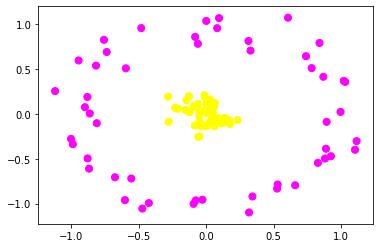

In [65]:
from sklearn.datasets.samples_generator import make_circles
X2, y2 = make_circles(100, factor=.1, noise=.1)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='spring')

In [66]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=123, test_size=0.25)

In [67]:
rbf_svm = SVC(kernel='rbf')

rbf_svm.fit(X2_train, y2_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [68]:
rbfsvm_pred = rbf_svm.predict(X2_test)

accuracy_score(y2_test, rbfsvm_pred)

1.0

In [69]:
lin_svm_2 = SVC(kernel='linear')
lin_svm_2 .fit(X2_train, y2_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [70]:
linsvm_pred = lin_svm_2.predict(X2_test)

accuracy_score(y2_test, linsvm_pred)

0.48

### Plot the Decision Boundary

We can also plot the decision boundary again for the case of data with two features. Note that in this case because we use only two features, the accuracy of linear SVM is not 100%.

The test accuracy is 97.37 %


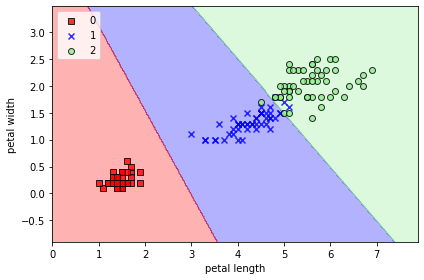

In [71]:
lin_svm_3 = SVC(kernel='linear')

lin_svm_3.fit(X1_train, y1_train)

accuracy = lin_svm_3.score(X1_test, y1_test)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

plot_decision_regions(X1, y1, classifier=lin_svm_3)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The test accuracy is 97.37 %


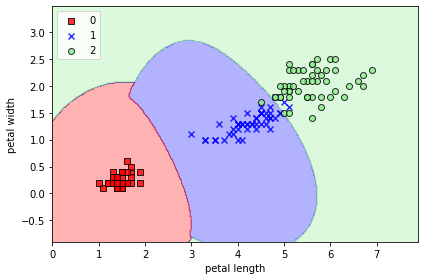

In [72]:
rbf_svm_3 = SVC(kernel='rbf')

rbf_svm_3.fit(X1_train, y1_train)

accuracy = rbf_svm_3.score(X1_test, y1_test)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

plot_decision_regions(X1, y1, classifier=rbf_svm_3)

## 12.3.3 Logistic Regression <a id="section6"/>

***Logistic Regression*** is one of the most frequently used classifiers, because it is simple and fast, it performs well on linearly separable data, and it can produce good baseline performance. The name can be confusing, because Logistic Regression is a classification algorithm, and not a regression algorithm.

The main concept of classification with Logistic Regression is shown in the next figure. Namely, for a set of input features $x_0, x_1, ..., x_m$, the algorithm calculates a set of weights $w_0, w_1, ..., w_m$. The product of the input features and weights $\boldsymbol{w^T*x}$ is passed through a **logistic sigmoid activation function**, also simply known as  sigmoid function. 

<img src="images/LR_pic1.png" alt="Drawing" style="width: 600px;"/>

The plot of a sigmoid function is shown on the next graph, for an input $z = \boldsymbol{w^T*x}$. The function squishes all inputs into the [0,1] range. The output of the sigmoid function can be interpreted as a probability that the data point belongs to class 1 or 0 in binary classification problems (two classes).

<img src="images/LR_pic2.png" alt="Drawing" style="width: 300px;"/>

For multiclass classification problems, the *softmax function* is used as a generalized version of the sigmoid function, and it outputs the probability that a data point belongs to multiple classes.

In [73]:
from sklearn.linear_model import LogisticRegression

lr_model_1 = LogisticRegression()
lr_model_1.fit(X_train, y_train)

accuracy = lr_model_1.score(X_test, y_test)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

The test accuracy is 97.37 %


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Plot the Decision Boundary

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The test accuracy is 78.95 %


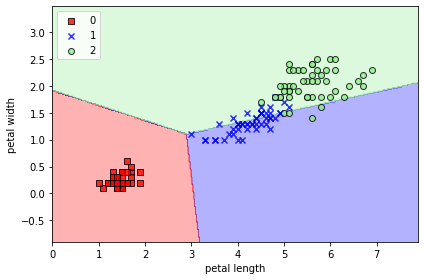

In [74]:
lr_model_2 = LogisticRegression()

lr_model_2.fit(X1_train, y1_train)

accuracy = lr_model_2.score(X1_test, y1_test)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

plot_decision_regions(X1, y1, classifier=lr_model_2)

## 12.3.4 Decission Trees <a id="section7"/>

***Decision trees*** is a machine learning algorithm based on applying an intuitive way to classify or label objects, by simply asking a series of questions designed to help the classification. A simple example is shown below, where we start from the root and create branches of the tree. The total  number of times the nodes are split is the *depth* of the tree. We can typically set a limit for the maximum depth of the tree. And, the same concept also applies to numerical data. 

<img src="images/DT_pic1.png" alt="Drawing" style="width: 450px;"/>

The trick in splitting the nodes is to ask the right questions. In training a decision tree classifier, the algorithm looks at the features and decides which questions (or "splits") contain the most information (i.e., how to maximize the information gain). 

Here is an example of training a decision tree classifier in scikit-learn on the iris data. 

In [75]:
from sklearn.tree import DecisionTreeClassifier

tree_model_1 = DecisionTreeClassifier(criterion='gini', max_depth=4)

tree_model_1.fit(X_train, y_train)

tree_pred = tree_model_1.predict(X_test)

accuracy = accuracy_score(y_test, tree_pred)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

The test accuracy is 97.37 %


Scikit-learn has a function for plotting decision trees. In the plot below, we can see that splitting was done mostly based on the features `X[2]` and `X[3]`. For instance, in the root node if the petal length is < 2.45 cm, then split the node, etc. 

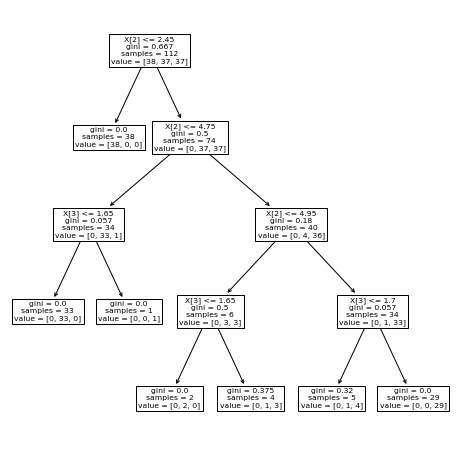

In [76]:
from sklearn import tree

plt.figure(figsize=(8,8))
tree.plot_tree(tree_model_1)
plt.show()

### Plot the Decision Boundary

The decision boundary is shown in the figure below. The decision tree algorithm separates the data by dividing the space of the input features into rectangles. 

One issue with Decision Trees is that it is easy to create trees that overfit the data. That is, such models can fit the training data almost perfectly, to the point where they begin fitting the noise in the data. This can be seen below for the decision boundary for the second class. 

The test accuracy is 94.74 %


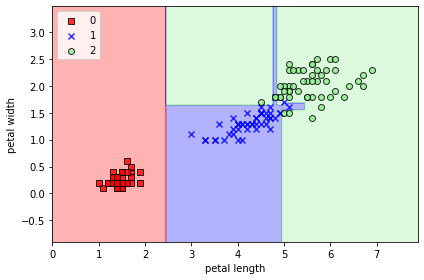

In [77]:
tree_model_2 = DecisionTreeClassifier(criterion='gini', max_depth=6)

tree_model_2.fit(X1_train, y1_train)

tree_pred = tree_model_2.predict(X1_test)

accuracy = accuracy_score(y1_test, tree_pred)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

plot_decision_regions(X1, y1, classifier=tree_model_2)

One possible way to address overfitting is to use an **ensemble method**, which essentially averages the results of many individual estimators which overfit the data. The resulting ensemble estimators are usually more robust and accurate than the individual estimators which make them up. 

One of the most common ensemble methods is Random Forest, in which the ensemble is made up of many decision trees. This is the topic of the next section.

## 12.3.5 Random Forest <a id="section8"/>

As we mentioned, ***Random Forest*** uses many decision trees (`n_estimators` below) to create a more robust model that has reduced overfitting on the data. Typically, larger number of estimators result in improved performance, but increased computational cost. 

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_model_1 = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1, n_jobs=2)

rf_model_1.fit(X_train, y_train)

rf_pred = rf_model_1.predict(X_test)

accuracy = accuracy_score(y_test, rf_pred)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

The test accuracy is 97.37 %


### Plot the Decision Boundary

The test accuracy is 97.37 %


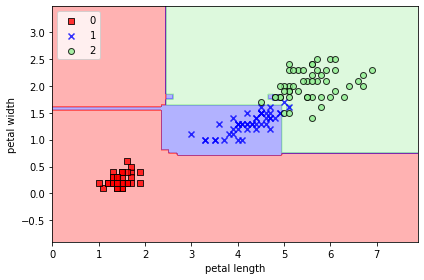

In [79]:
rf_model_2 = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1, n_jobs=2)

rf_model_2.fit(X1_train, y1_train)

rf_pred = rf_model_2.predict(X1_test)

accuracy = accuracy_score(y1_test, rf_pred)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

plot_decision_regions(X1, y1, classifier=rf_model_2)

## 12.3.6 Naive Bayes <a id="section9"/>

***Naive Bayes*** are a set of learning algorithms that are based on applying Bayes' theorem. According to the theorem, the posterior probability of the class label $y$ given input features $x_1, \dots, x_n$ can be calculated based on the prior probability of the class $P(y)$, the likelihood of the training data given the class label $P(x_1, \dots, x_n \mid y)$, and the evidence $P(x_1, \dots, x_n)$.

$$[P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)}
                                 {P(x_1, \dots, x_n)}$$
                                 
This method is called Naive Bayes, because it is based on a "naive" assumption that the input features are independent given the class label. 

The implementation is shown below. 

In [80]:
from sklearn.naive_bayes import GaussianNB

nb_model_1 = GaussianNB()

nb_model_1.fit(X_train, y_train)

nb_pred = nb_model_1.predict(X_test)

accuracy = accuracy_score(y_test, nb_pred)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

The test accuracy is 97.37 %


Scikit-learn offers several different implementations of Naive Bayes, including GaussianNB, BernoulliNB, CategoricalNB, and MutlinomialNB, which differ based on the assumption made about the distribution of the training data.

## 12.3.7 Perceptron <a id="section10"/>

***Perceptron*** classification algorithm has similarities to the Logistic Regression classifier, and they both can be seen as a simple one-layer neural network. Both algorithms learn a set of weights and use similar learning strategies. One difference is that Perceptron uses a step threshold function to output the class prediction, and Logistic Regression uses a sigmoid logistic function to output the class prediction. 

A graph depicting classification with Perceptron is shown below.  

<img src="images/PPN_pic1.png" alt="Drawing" style="width: 450px;"/>

In the model below, the argument `max_iter` is the number of epochs (i.e., the number of passes through the training data), and `eta0` is the learning rate of the model. 

In [81]:
from sklearn.linear_model import Perceptron

ppn_model_1 = Perceptron(max_iter=40, eta0=0.1)

ppn_model_1.fit(X_train, y_train)

ppn_pred = ppn_model_1.predict(X_test)

accuracy = accuracy_score(y_test, ppn_pred)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

The test accuracy is 65.79 %


This type of learning algorithms require more finetuning of the hyperparameters. One of the most important parameters is the learning rate (`eta0` in this case). Let's try to change it.

In [82]:
ppn_model_2 = Perceptron(max_iter=40, eta0=0.001)

ppn_model_2.fit(X_train, y_train)

ppn_pred = ppn_model_2.predict(X_test)

accuracy = accuracy_score(y_test, ppn_pred)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

The test accuracy is 78.95 %


However, the performance is not very good in this case. One reason may be because this algorithm is more sensitive to the range of input data. We will learn next week about scaling the data in scikit-learn. 

### Plot the Decision Boundary

The test accuracy is 81.58 %


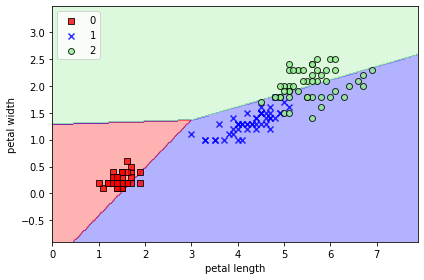

In [83]:
ppn_model_3 = Perceptron(max_iter=40, eta0=0.001)

ppn_model_3.fit(X1_train, y1_train)

ppn_pred = ppn_model_3.predict(X1_test)

accuracy = accuracy_score(y1_test, ppn_pred)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

plot_decision_regions(X1, y1, classifier=ppn_model_3)

## 12.3.8 Stochastic Gradient Descent (SGD) <a id="section11"/>

***Stochastic Gradient Descent*** (SGD) is another popular estimator in scikit-learn. In fact, SGD is an optimization technique, and it does not correspond to a specific family of machine learning models. In other words, it is just an approach to train a model using stochastic gradient descent. It supports different loss functions, and for instance, if we use `loss='perceptron'` it will be equivalent to solving the Perceptron algorithm with SGD optimization. Using `loss='log'` is equivalent to training Logistic Regression with SGD, or using `loss='hinge'` corresponds to linear SVM. 

In [84]:
from sklearn.linear_model import SGDClassifier

sgd_model_1 = SGDClassifier(max_iter=80, loss='hinge', random_state=1)

sgd_model_1 .fit(X_train, y_train)

sgd_pred = sgd_model_1 .predict(X_test)

accuracy = accuracy_score(y_test, sgd_pred)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

The test accuracy is 92.11 %


In [85]:
from sklearn.linear_model import SGDClassifier

sgd_model_2 = SGDClassifier(max_iter=40, loss='perceptron', random_state=1)

sgd_model_2.fit(X_train, y_train)

sgd_pred = sgd_model_2.predict(X_test)

accuracy = accuracy_score(y_test, sgd_pred)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

The test accuracy is 65.79 %


C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Similar to Perceptron, SGD is sensitive to feature scaling. And also, scikit-learn offers SGDRegressor for regression tasks. 

# 12.4 Unsupervised Learning: Clustering <a id="section12"/>

**Unsupervised learning** algorithms employ data without labels, and it often focuses on finding similarities or patterns between the set of samples. Unsupervised learning comprises tasks such as *dimensionality reduction*, *clustering*, and
*density estimation*. 

There are also *semi-supervised learning* approaches, where for example, unsupervised learning can be used to find informative features in data, and then these features can be used within a supervised learning framework.

### Clustering with k-Means

Clustering methods find *clusters* in the data, i.e., they group together data points that are homogeneous with respect to a given criterion.

A popular clustering algorithm is *k*-means clustering, which iteratively calculates distances from data points to centroids of clusters, until the distances from all data points to the centroids of the clusters are minimized. It employs the well-known Expectation Maximization approach to cluster the data points.

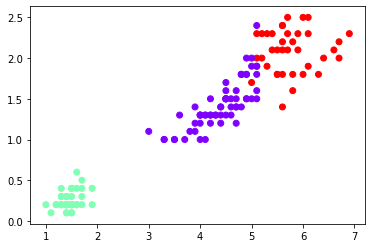

In [86]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) 
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X[:, 2], X[:, 3], c=y_pred, cmap='rainbow');

Here is one more example.

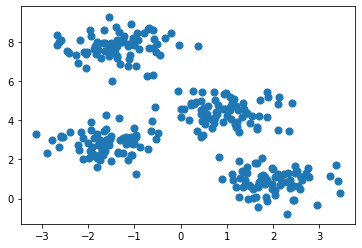

In [87]:
from sklearn.datasets.samples_generator import make_blobs
X3, y3 = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X3[:, 0], X3[:, 1], s=50);

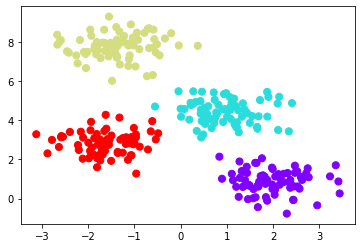

In [90]:
k_means_2 = KMeans(n_clusters=4, random_state=0)  # 4 clusters
k_means_2.fit(X3)
kmeans_pred = k_means_2.predict(X3)
plt.scatter(X3[:, 0], X3[:, 1], c=kmeans_pred, s=50, cmap='rainbow');

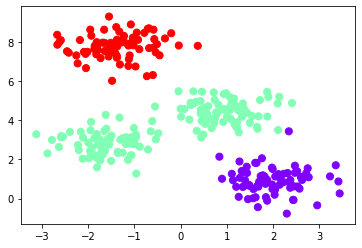

In [91]:
k_means_2 = KMeans(n_clusters=3, random_state=0)  # 3 clusters
k_means_2.fit(X3)
kmeans_pred = k_means_2.predict(X3)
plt.scatter(X3[:, 0], X3[:, 1], c=kmeans_pred, s=50, cmap='rainbow');

# 12.5 Flow Chart: How to Choose an Estimator <a id="section13"/>

This is a flow chart created by the scikit-learn contributor Andreas Mueller that gives a nice summary of which algorithms to choose in various situations. 

<img src="images/ml_map.png" alt="Drawing" style="width: 800px;"/>

### Recap: Scikit-learn's Estimator Interface

Scikit-learn strives to have a uniform interface across all methods, as we saw in the examples. Given a scikit-learn *estimator* object named `model`, the following methods are available:

- Available in **all estimators**
  + `model.fit()`: fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()`: given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each item in the array.
  + `model.predict_proba()`: For classification problems, some estimators also provide
    this method, which returns the probability that a new sample has for each category.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()`: for classification or regression problems, most estimators implement
    a score method. Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.predict()`: predict labels in clustering algorithms.
  + `model.transform()`: given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()`: some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

# 12.6 Appendix (not required for quizzes and assignments) <a id="section14"/>

# Application Example: Optical Character Recognition

To demonstrate the above principles on a more interesting problem, let's consider OCR (Optical Character Recognition) – that is, recognizing hand-written digits. Here, we will use scikit-learn's set of pre-formatted digits, which is built into the library.

#### Loading and visualizing the digits data

We'll use scikit-learn's data access interface and take a look at this data:

In [92]:
from sklearn import datasets
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

Let's plot a few images and show the ground-truth label in the lower left corner.

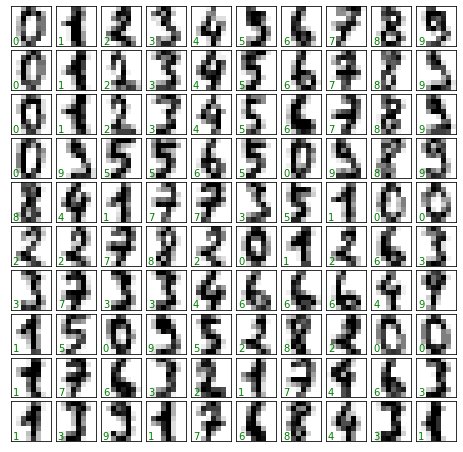

In [93]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

The images are just 8x8 pixels.  

In [94]:
# The images themselves
print(digits.images.shape)
print(digits.images[0])

(1797, 8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Because scikit-learn uses two-dimensional inputs, the images has been reshaped from 8x8 pixels into one long vector of 64 elements. 

In [95]:
# The data for use in our algorithms
print(digits.data.shape)
print(digits.data[0])

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [96]:
# The target label
print(digits.target)

[0 1 2 ... 8 9 8]


The data have 1797 samples in 64 dimensions.

#### Classification on Digits

Let's first split the digits into a training and testing sample.

In [97]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=2)
print(Xtrain.shape, Xtest.shape)

(1347, 64) (450, 64)


And, we will use a simple Logistic Regression as a classification algorithm.

In [98]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.9466666666666667

In [100]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

[[42  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  3  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  2  0  3  1  0]
 [ 0  2  0  0 36  0  0  0  1  1]
 [ 0  0  0  0  0 52  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 48  1  0]
 [ 0  2  0  0  0  0  0  0 38  0]
 [ 0  0  0  1  0  1  0  1  2 34]]


We can plot the confusion matrix as an image.

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


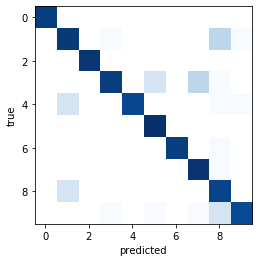

In [101]:
plt.imshow(np.log(confusion_matrix(ytest, ypred)),
           cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

We can also look at some of the images along with their predicted labels. The incorrect labels are in red color.

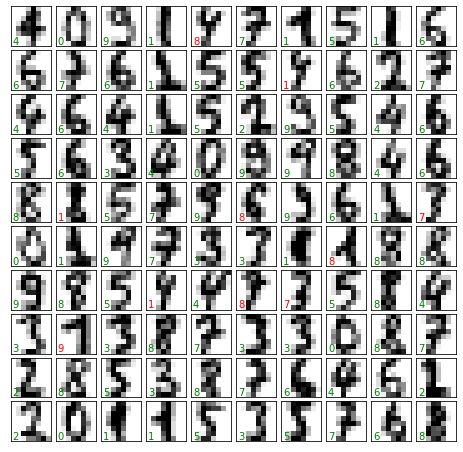

In [102]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

In fact, some of the mislabeled cases with this simple logistic regression algorithm are difficult to classify even for us.

# References <a id="section15"/>

1. PyCon 2015 Sckikit-Learn Tutorial, Jake VanderPlas available at: [https://github.com/jakevdp/sklearn_pycon2015](https://github.com/jakevdp/sklearn_pycon2015).
2. Python Machine Learning (2nd Ed.) Code Repository, Sebastian Raschka, available at: [https://github.com/rasbt/python-machine-learning-book-2nd-edition](https://github.com/rasbt/python-machine-learning-book-2nd-edition). 
3. Complete Machine Learning Package, Jean de Dieu Nyandwi, available at: [https://github.com/Nyandwi/machine_learning_complete](https://github.com/Nyandwi/machine_learning_complete).
4. Advanced Python for Data Science, University of Cincinnati, available at: [https://github.com/uc-python/advanced-python-datasci](https://github.com/uc-python/advanced-python-datasci).



[BACK TO TOP](#section0)